Using TensorFlow backend.


             0  1
0   19500_left  0
1  19500_right  0
2   19503_left  0
3  19503_right  0
4   19504_left  1
(4000,)
0
Instructions for updating:
Colocations handled automatically by placer.
2019-02-21 14:46:26.862966
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 3200 samples, validate on 800 samples
Epoch 1/30
 - 8s - loss: 4.3477 - acc: 0.7278 - val_loss: 4.6138 - val_acc: 0.7137
Epoch 2/30
 - 7s - loss: 4.2461 - acc: 0.7366 - val_loss: 4.6138 - val_acc: 0.7137
Epoch 3/30
 - 7s - loss: 4.2461 - acc: 0.7366 - val_loss: 4.6138 - val_acc: 0.7137
Epoch 4/30
 - 7s - loss: 4.2461 - acc: 0.7366 - val_loss: 4.6138 - val_acc: 0.7137
Epoch 5/30
 - 7s - loss: 4.2461 - acc: 0.7366 - val_loss: 4.6138 - val_acc: 0.7137
Epoch 6/30
 - 7s - loss: 4.2461 - acc: 0.7366 - val_loss: 4.6138 - val_acc: 0.7137
Epoch 7/30
 - 7s - loss: 4.2461 - acc: 0.7366 - val_loss: 4.6138 - val_acc:

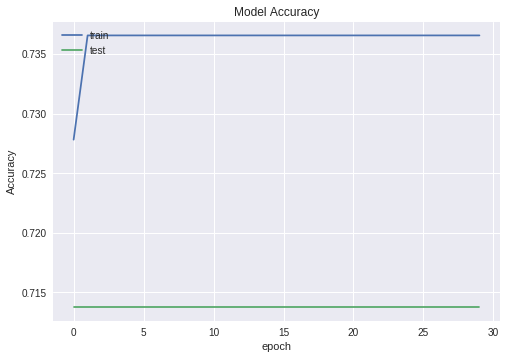

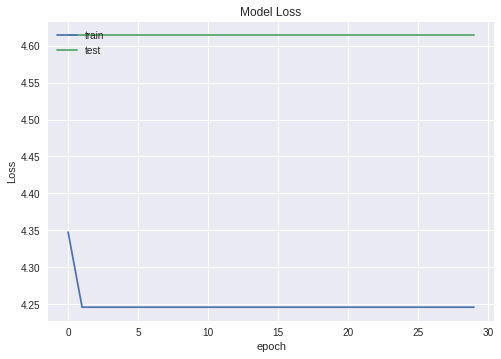

In [3]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/DiabeticRetinopathy_Detection/imagedata_train_0_4000.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/DiabeticRetinopathy_Detection/train002Labels.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:4000,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 256 output neurons and a dropout layer1
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 256 output neurons and a dropout layer2
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.001, decay=0.0, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 30, verbose = 2, validation_split = 0.2)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('my_model_train002_0_4000.h5')  # creates a HDF5 file 'my_model.h5'
    new_model.save_weights('my_model_weigths_train002_0_4000.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls "/gdrive/My Drive/DiabeticRetinopathy_Detection"

DR_Train.ipynb	imagedata_train_0_4000.npy  train002Labels.csv


             0  1
0   19500_left  0
1  19500_right  0
2   19503_left  0
3  19503_right  0
4   19504_left  1
(4000,)
0
2019-02-21 16:02:41.587027
Train on 3800 samples, validate on 200 samples
Epoch 1/20
 - 10s - loss: 5.2355 - acc: 0.6176 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 2/20
 - 10s - loss: 4.3614 - acc: 0.7166 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 3/20
 - 10s - loss: 4.3598 - acc: 0.7174 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 4/20
 - 10s - loss: 4.3886 - acc: 0.7166 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 5/20
 - 10s - loss: 4.2920 - acc: 0.7200 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 6/20
 - 10s - loss: 4.3025 - acc: 0.7100 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 7/20
 - 10s - loss: 4.2498 - acc: 0.7084 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 8/20
 - 10s - loss: 4.2892 - acc: 0.6968 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 9/20
 - 10s - loss: 4.2145 - acc: 0.7000 - val_loss: 3.5973 - val_acc: 0.7750
Epoch 10/20
 - 10s - loss: 4.0600 - acc: 0.6847 - va

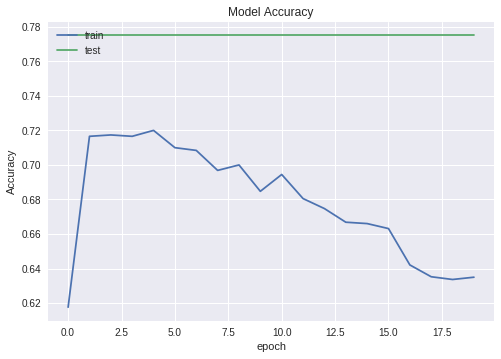

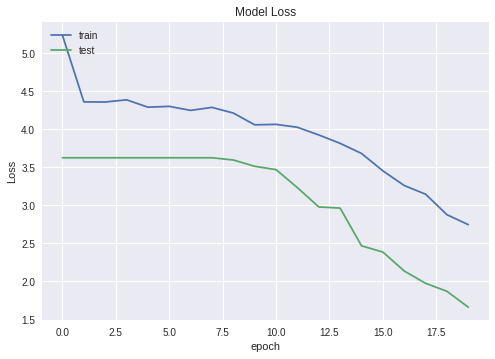

In [7]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/DiabeticRetinopathy_Detection/imagedata_train_0_4000.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/DiabeticRetinopathy_Detection/train002Labels.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:4000,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 128 output neurons and a dropout layer1
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 128 output neurons and a dropout layer2
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.00001, decay=0.0, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 25, epochs = 20, verbose = 2, validation_split = 0.05)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('my_model_train002_0_4000_128.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



             0  1
0   19500_left  0
1  19500_right  0
2   19503_left  0
3  19503_right  0
4   19504_left  1
(4000,)
0
2019-02-21 16:13:33.619026
Train on 3800 samples, validate on 200 samples
Epoch 1/10
 - 11s - loss: 4.5251 - acc: 0.7084 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 2/10
 - 10s - loss: 4.3564 - acc: 0.7292 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 3/10
 - 10s - loss: 4.3562 - acc: 0.7295 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 4/10
 - 10s - loss: 4.3544 - acc: 0.7297 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 5/10
 - 10s - loss: 4.3557 - acc: 0.7289 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 6/10
 - 10s - loss: 4.3557 - acc: 0.7297 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 7/10
 - 10s - loss: 4.3562 - acc: 0.7292 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 8/10
 - 10s - loss: 4.3552 - acc: 0.7297 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 9/10
 - 10s - loss: 4.3551 - acc: 0.7292 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 10/10
 - 10s - loss: 4.3393 - acc: 0.7271 - va

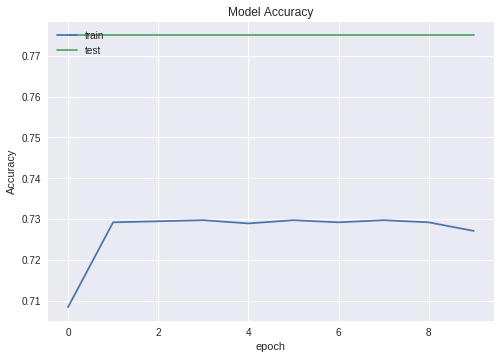

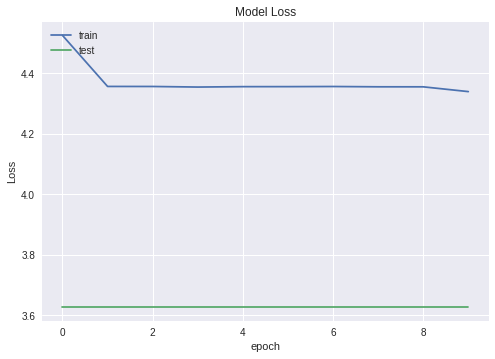

In [10]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/DiabeticRetinopathy_Detection/imagedata_train_0_4000.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/DiabeticRetinopathy_Detection/train002Labels.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:4000,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 128 output neurons and a dropout layer1
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 128 output neurons and a dropout layer2
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 25, epochs = 10, verbose = 2, validation_split = 0.05)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    #new_model.save('my_model_train002_0_4000_128.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



             0  1
0   19500_left  0
1  19500_right  0
2   19503_left  0
3  19503_right  0
4   19504_left  1
(4000,)
0
2019-02-21 16:28:36.917516
Train on 3800 samples, validate on 200 samples
Epoch 1/10
 - 11s - loss: 9.8804 - acc: 0.2637 - val_loss: 3.4308 - val_acc: 0.7650
Epoch 2/10
 - 11s - loss: 5.8440 - acc: 0.5489 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 3/10
 - 10s - loss: 4.8732 - acc: 0.6389 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 4/10
 - 10s - loss: 4.6264 - acc: 0.6797 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 5/10
 - 10s - loss: 4.5543 - acc: 0.6895 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 6/10
 - 10s - loss: 4.5168 - acc: 0.7005 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 7/10
 - 10s - loss: 4.4710 - acc: 0.7037 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 8/10
 - 10s - loss: 4.3982 - acc: 0.7108 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 9/10
 - 10s - loss: 4.4156 - acc: 0.7103 - val_loss: 3.6266 - val_acc: 0.7750
Epoch 10/10
 - 10s - loss: 4.4298 - acc: 0.7118 - va

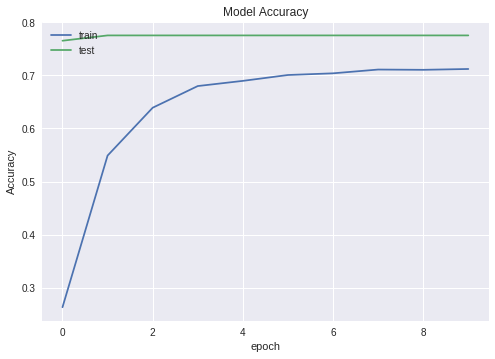

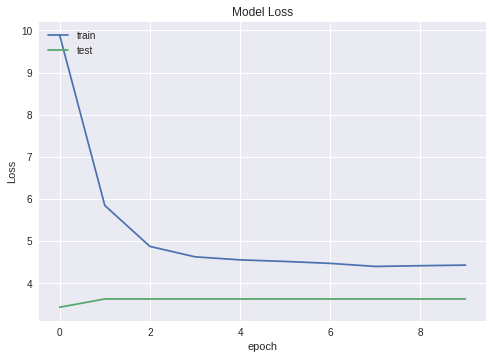

In [15]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/DiabeticRetinopathy_Detection/imagedata_train_0_4000.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/DiabeticRetinopathy_Detection/train002Labels.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:4000,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#Adding classifier neural network (Dense + Softmax)
new_model = Sequential()
#add a fc1 layer with 128 output neurons and a dropout layer1
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#add a fc2 layer with 128 output neurons and a dropout layer2
new_model.add(Dense(units = 256, activation = 'relu', kernel_initializer='uniform'))
new_model.add(Dropout(rate = 0.5, noise_shape=None, seed=None))
#adding a softmax layer with 5 classes
new_model.add(Dense(units = 5))
new_model.add(keras.layers.Activation('softmax'))
#configures the model for training
sgd = SGD(lr=0.000001, decay=1e-6, momentum=0.9,nesterov=True)
new_model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics=['accuracy'] )

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 25, epochs = 10, verbose = 2, validation_split = 0.05)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    #new_model.save('my_model_train002_0_4000_128.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting loss of training and validation
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

